<a href="https://colab.research.google.com/github/acsenrafilho/ai.dojo.masterclass/blob/main/scripts/EP001-Primeira-IA-do-Zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Masterclass - EP001 - Primeira IA do zero

## Objetivo 

Um concurso no Instagram de uma petshop está promovendo uma ação publicitária para pessoas com pets (cachorro e gato). Nosso objetivo é fazer uma IA que possa detectar se a fotografia enviada pelas pessoas que curtem a página da petshop tem na cena um cachorro ou um gato. Dessa forma a fotografia fica qualificada para participar da promoção.

## Dataset
Foi escolhido o dataset: [Kaggle - Classificação cachorro vs gato](https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset?resource=download)

**Observação:** *O dataset foi carregado via API Kaggle para o Colab. Se desejar fazer o mesmo teste com o seu ambiente Google Colab, faça a [ integração com o Kaggle](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/) utilizando as suas credenciais no Kaggle*


# Setup do ambiente

1. Ajuste da API Kaggle 
2. Download do dataset para o exemplo dessa masterclass
3. Unzip dataset
4. Definição de algumas funções simples para ajudar no desenvolvimento do exemplo

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! kaggle datasets download shaunthesheep/microsoft-catsvsdogs-dataset

 98% 771M/788M [00:04<00:00, 141MB/s]
100% 788M/788M [00:05<00:00, 164MB/s]


In [ ]:
! unzip microsoft-catsvsdogs-dataset.zip

In [ ]:
# Libs de suporte
import random
import os

# Funções de suporte

def getRandomImagesPaths(folder_path, number_of_samples):
    files_list = os.listdir(folder_path)
    output_file_list = []
    counter = 0
    while counter < number_of_samples:
      output_file_list.append(folder_path+"/"+random.choice(files_list))
      counter += 1
    
    return output_file_list

def showImages(sample_paths):
  for image_path in sample_paths:
    print("Image path: "+image_path)
    img = cv.imread(image_path)
    if img is not None:
      print("Image resolution: ")
      print(img.shape)
      print("Image type: ")
      print(img.dtype)
      print("Max pixel: ")
      print(img.max())
      print("Min pixel: ")
      print(img.min())
      cv2_imshow(img)


# Etapa 1 - Análise e montagem do dataset 

In [ ]:
# Libs de leitura e processamento de dados
import numpy as np
import cv2 as cv

# Libs de visualização
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Libs de machine learning
import keras
from sklearn.model_selection import train_test_split

Exemplos de imagens: Cachorro
Image path: /content/PetImages/Dog/6093.jpg
Image resolution: 
(500, 496, 3)
Image type: 
uint8
Max pixel: 
255
Min pixel: 
0


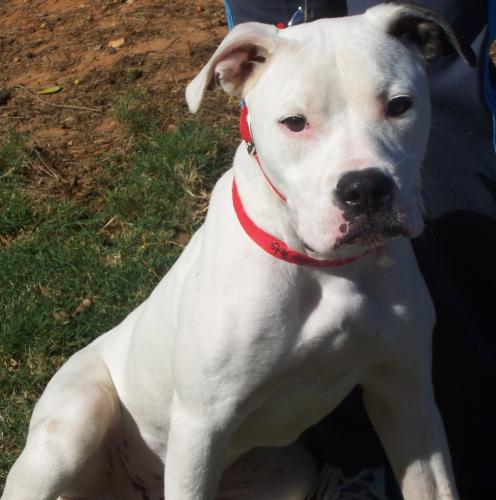

Image path: /content/PetImages/Dog/7750.jpg
Image resolution: 
(480, 452, 3)
Image type: 
uint8
Max pixel: 
255
Min pixel: 
0


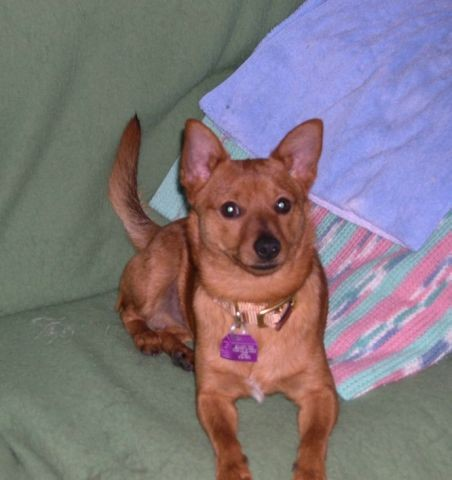

Image path: /content/PetImages/Dog/11551.jpg
Image resolution: 
(267, 334, 3)
Image type: 
uint8
Max pixel: 
255
Min pixel: 
0


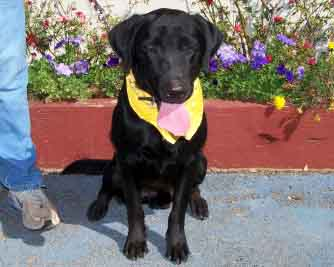

Image path: /content/PetImages/Dog/737.jpg
Image resolution: 
(361, 300, 3)
Image type: 
uint8
Max pixel: 
255
Min pixel: 
0


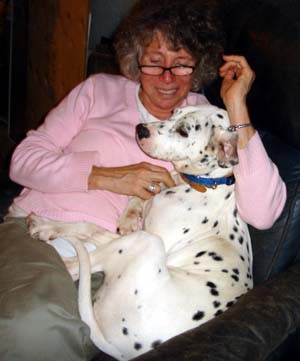

Image path: /content/PetImages/Dog/12472.jpg
Image resolution: 
(351, 400, 3)
Image type: 
uint8
Max pixel: 
255
Min pixel: 
0


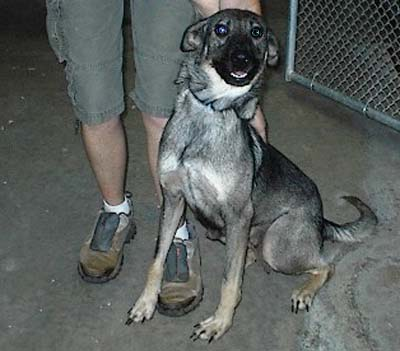

Image path: /content/PetImages/Dog/8441.jpg
Image resolution: 
(375, 500, 3)
Image type: 
uint8
Max pixel: 
255
Min pixel: 
17


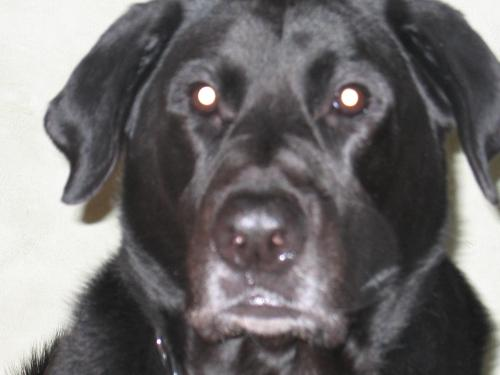

Image path: /content/PetImages/Dog/10734.jpg
Image resolution: 
(235, 172, 3)
Image type: 
uint8
Max pixel: 
255
Min pixel: 
0


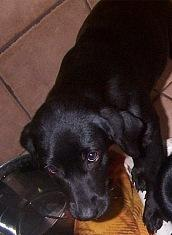

Image path: /content/PetImages/Dog/10187.jpg
Image resolution: 
(180, 240, 3)
Image type: 
uint8
Max pixel: 
255
Min pixel: 
5


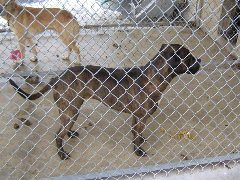

Image path: /content/PetImages/Dog/6322.jpg
Image resolution: 
(397, 500, 3)
Image type: 
uint8
Max pixel: 
255
Min pixel: 
0


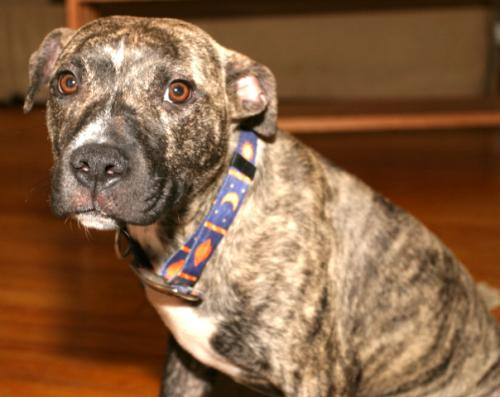

Exemplos de imagens: Gato
Image path: /content/PetImages/Cat/1135.jpg
Image resolution: 
(375, 368, 3)
Image type: 
uint8
Max pixel: 
254
Min pixel: 
0


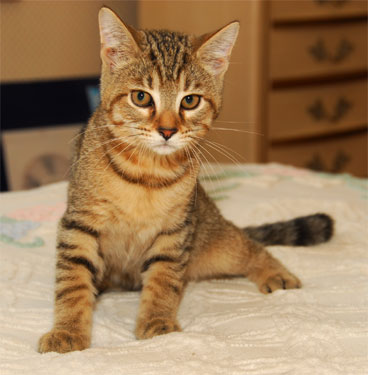

Image path: /content/PetImages/Cat/8478.jpg
Image resolution: 
(500, 391, 3)
Image type: 
uint8
Max pixel: 
255
Min pixel: 
0


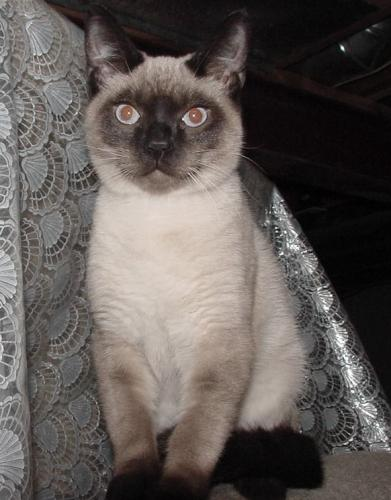

Image path: /content/PetImages/Cat/7316.jpg
Image resolution: 
(225, 300, 3)
Image type: 
uint8
Max pixel: 
255
Min pixel: 
0


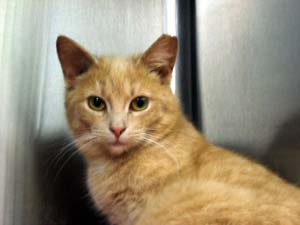

Image path: /content/PetImages/Cat/947.jpg
Image resolution: 
(500, 333, 3)
Image type: 
uint8
Max pixel: 
255
Min pixel: 
19


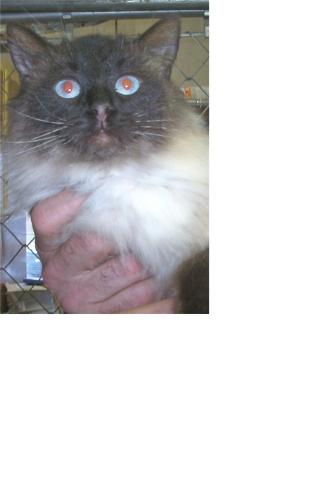

Image path: /content/PetImages/Cat/11242.jpg
Image resolution: 
(500, 500, 3)
Image type: 
uint8
Max pixel: 
255
Min pixel: 
0


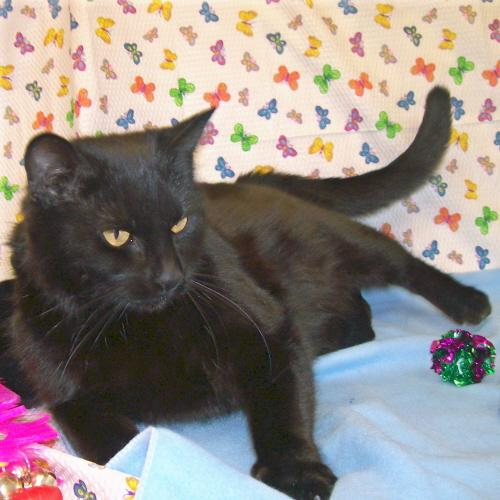

Image path: /content/PetImages/Cat/4295.jpg
Image resolution: 
(384, 500, 3)
Image type: 
uint8
Max pixel: 
255
Min pixel: 
0


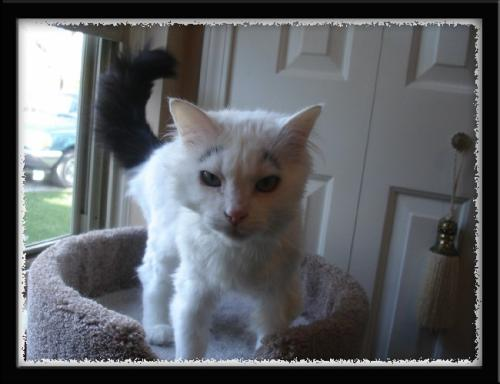

Image path: /content/PetImages/Cat/8757.jpg
Image resolution: 
(120, 125, 3)
Image type: 
uint8
Max pixel: 
206
Min pixel: 
4


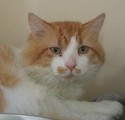

Image path: /content/PetImages/Cat/11142.jpg
Image resolution: 
(332, 500, 3)
Image type: 
uint8
Max pixel: 
255
Min pixel: 
0


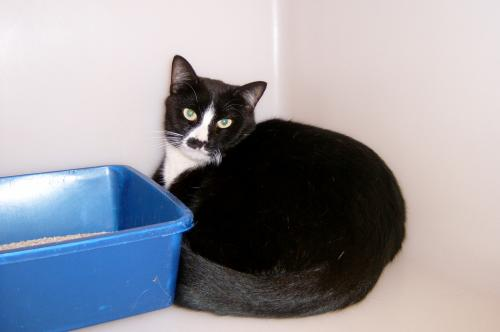

Image path: /content/PetImages/Cat/9232.jpg
Image resolution: 
(332, 500, 3)
Image type: 
uint8
Max pixel: 
255
Min pixel: 
0


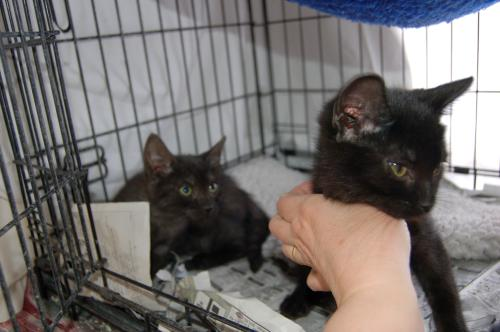

<Figure size 720x720 with 0 Axes>

In [ ]:
# Abrir um conjunto de imagens para avaliar o dataset
plt.figure(figsize=(10, 10))

# Exemplos de imagens contidas no dataset
dog_samples = getRandomImagesPaths("/content/PetImages/Dog", 9)
cat_samples = getRandomImagesPaths("/content/PetImages/Cat", 9)

print("Exemplos de imagens: Cachorro")
showImages(dog_samples)

print("Exemplos de imagens: Gato")
showImages(cat_samples)


# Etapa 2 - Preparação do treinamento da IA

In [ ]:
# Separação dos datasets: Treino, Validação e Teste

train_set, test_set = train_test_split()

Esse minino vale ouro!


# Etapa 3 - Iniciar treino do modelo

# Testar modelo com exemplos

## Situação 1
### Como o modelo responde a imagens do mesmo contexto que o dataset de treino?

Aqui neste caso nós adicionamos algumas imagens do mesmo repositório dos dados utilizados no treino e validação.

**IMPORTANTE:** *Nós não usamos imagens que foram incluídas na etapa de treino, pois isso iria deturpar o resultado do modelo de IA*


## Situação 2
### Se não tiver cachorro ou gato, o algoritmo retorna o que?

O modelo não sabe nada além do que é cachorro ou gato, pois era somente isso que foi fornecido no dataset de treinamento.

Logo, não podemos esperar que o modelo acerte qualquer outro tipo de classe.


## Situação 3
### Quantos animais há na cena? Cenas com mais objetos o algoritmo consegue responder bem?

De fato o modelo foi treinado apenas para dizer, de forma contundente, se na fotografia consta um cachorro ou um gato, mas não sabe nada mais do que isso.

Modelos mais complexos precisam ser montados caso queira saber informações como quantidade de animais, tipos a mais de animais, etc.
